## Data Science Salaries

### Introduction:
This analysis is done using the Data Science Salaries dataset which contains the salaries of some data science and other features that affects the salary.

The data used was collected from kaggle. <a href = 'https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries'> click here to open the data </a>

The data contains 607 different data science records with 12 different features describing each Data Science role. The main purpose of this analysis is to stregthen my analytical thing skills by answering the following question below from the data.

#### Questions to answer:
<ul>
    <li>What is the most common Data Science Role?</li>
    <li>What is the most common payment currency?</li>
    <li>What is the salary trend for Data Science Roles?</li>
    <li>What is the average Salary based on Experience Level</li>
    <li>What is the trend for remote jobs? Is there an increase of decline for remote jobs?</li>
    <li>Which countries rank among the Top/Least 5 countries as regards to average Salary in USD?</li> 
    <li>What branch of data science earns the most?</li>
</ul>

Check the <strong>ReadMe</strong> file attached to know more about the variables/features used in this analysis.

### importing basic libraries for analysis

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

### reading in the data

In [22]:
data = pd.read_csv('ds_salaries.csv')

### Data Exploration

In [23]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### checking the shape of data

In [24]:
data.shape

(607, 12)

### checking the available features in the dataset

In [25]:
print(data.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


### checking the statistics of the data

In [26]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### checking the info and datatypes of each feature

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [28]:
#dropping the Unnamed: 0 column since it does not say anything useful
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
# seperating the data into numerical and categorical data
cat = [f for f in data.columns if data[f].dtype == 'object']
num = [f for f in data.columns if f not in cat]

In [29]:
def countplot(df, column, xlabel, ylabel = 'Count', label = None):
    plt.figure(figsize = (12, 10))
    sns.countplot(data = df, x = column)
    plt.xlabel(xlabel)
    plt.title(f'Count of Various {xlabel}')
    plt.ylabel(ylabel)
    if label != None:
        plt.xticks(np.arange(0,len(label)), label)
    if df[column].nunique() > 10:
        plt.xticks(rotation = 90)
    plt.show()

#### Question:
What is the most common Data Science Role?

In the this plot, there are so many Data Science Roles which i will be grouping for better analysis now and later. But from the above plot we can still see that <strong>Data Science</strong>, <strong>Data Engineer</strong> and <strong>Data Analyst</strong> are the most prominent roles.

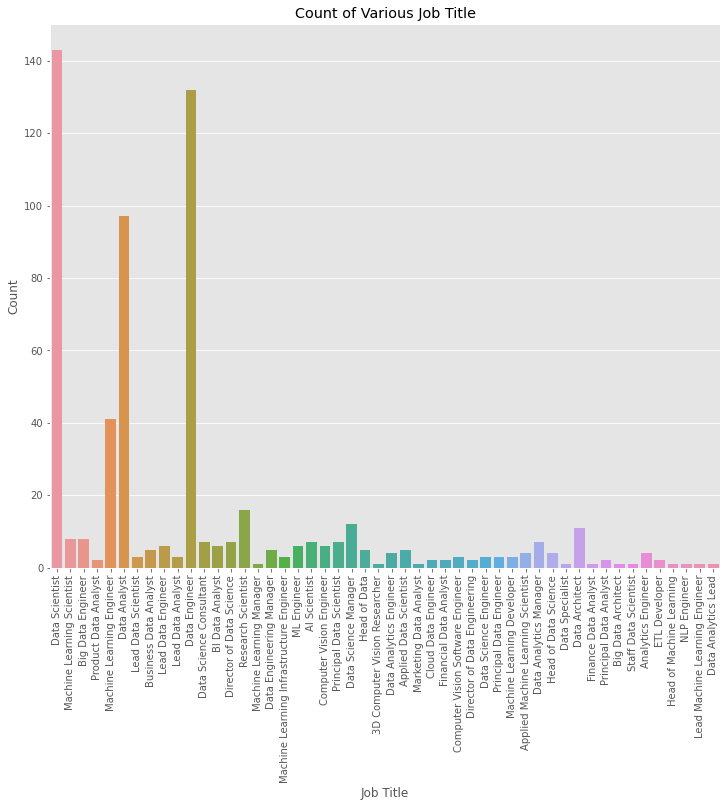

In [30]:
countplot(data, 'job_title', 'Job Title')

In [31]:
# collecting data science jobs
data.job_title.loc[data.job_title.str.contains('Data Scientist')] = 'Data Scientist'
# collecting data analyst jobs
data.job_title.loc[(data.job_title.str.contains('Data Analyst')) |
                   (data.job_title.str.contains('Data Analytics'))] = 'Data Analyst'
# collecting data engineer jobs
data.job_title.loc[data.job_title.str.contains('Data Engineer')] = 'Data Engineer'
# changing the rest which does not fall into the above category to others
data.job_title = data.job_title.apply(lambda x : x if x in ['Data Scientist', 'Data Analyst', 'Data Engineer'] else 'Others')


This plot further confirms our analysis above as Data Science and Data Engineer leads as the most common roles.

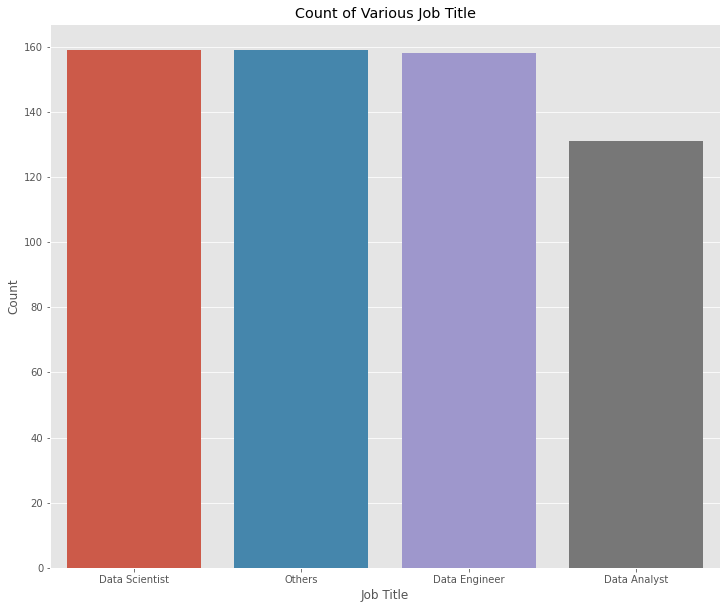

In [32]:
# replotting again to see the new job title groupings
countplot(data, 'job_title', 'Job Title')

### Question
What is the most common payment currency?

We can see that the most used payment currency is the USD with almost 400 recordings of payments in USD. It is the most used currency in the world so it makes sense that it is the most used payment currency for <strong>Data Science</strong> roles

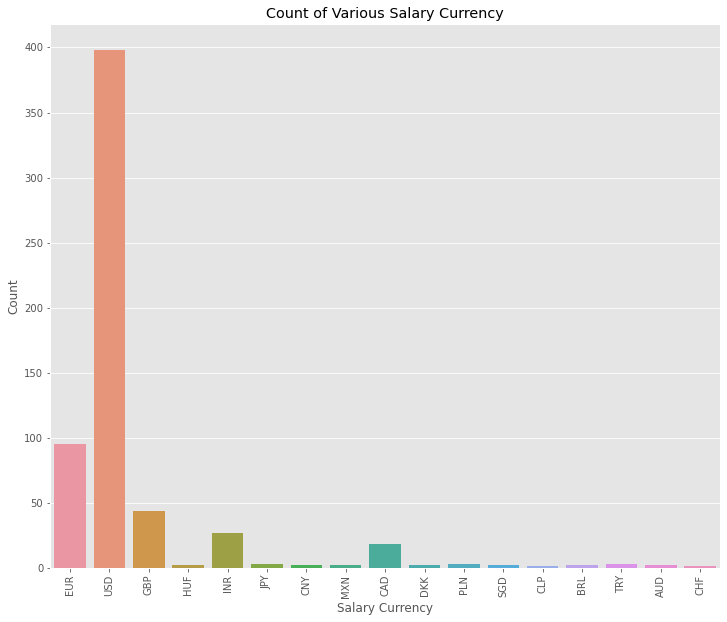

In [33]:
countplot(data, 'salary_currency', 'Salary Currency')

#### Question
What is the salary trend for Data Science Roles?

<strong>Data Science</strong> salaries has been on the up since year 2020. The increase in 2021 wasn't so great as compared to the increase in 2022. That means it is safe to say that there will be an increase in these salaries as time goes on.

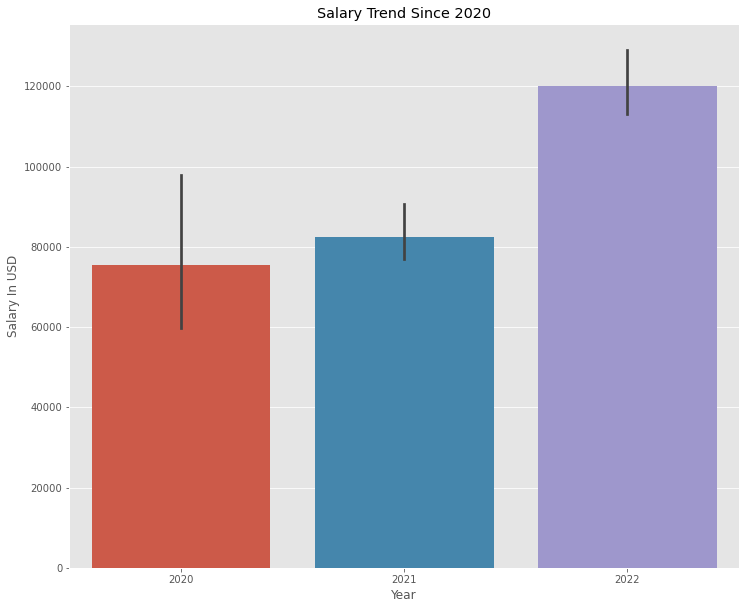

In [34]:
# check the trend of salary in usd for the since 2020
plt.figure(figsize = (12, 10))
sns.barplot(data = data, x = 'work_year', y = 'salary_in_usd', estimator = np.median)
plt.title('Salary Trend Since 2020')
plt.xlabel('Year')
plt.ylabel('Salary In USD')
plt.show()

#### Question
What is the average Salary based on Experience Level?

The Executive/ Expert level earn over 171,000 USD on an average. It is the highest earn position(as expected). It is followed by the Senior level Data Scientist who earn about 135,000 USD on an average. The least is the entry level who earns about 56,000 USD on an average. 

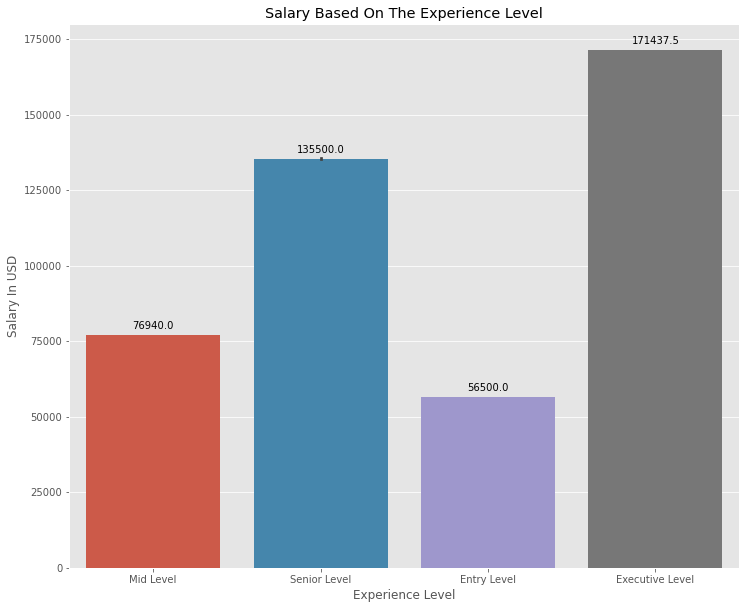

In [35]:
# checking the salary and experience level
plt.figure(figsize = (12, 10))

bar = sns.barplot(data = data, x = 'experience_level', y = 'salary_in_usd', estimator = np.median, ci = True)
# adding annotation to the plot
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
    
plt.title('Salary Based On The Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary In USD')
plt.xticks(np.arange(0,4),labels = ['Mid Level', 'Senior Level', 'Entry Level', 'Executive Level'])
plt.show()

#### Question
What is the trend for remote jobs? Is there an increase of decline for remote jobs?

From the graph, we can see that there was an increase for remote jobs in 2021, but there is a drop in 2022. There are two likely causes. <br>
First, the record was collected for only the first part of the year which means that there will more remote jobs by the end of the year.
Secondly, due to the rise in covid 19 in 2021, remote jobs was in demand due to restriction.

But by the end of the Year we can then confirm the rise in remote jobs or not.

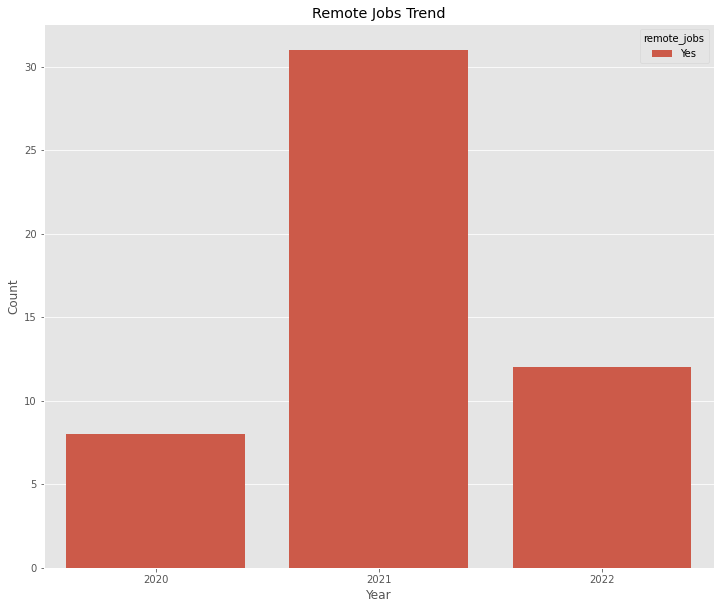

In [36]:
# collecting remote jobs
data['remote_jobs'] = None
data['remote_jobs'].loc[data.employee_residence == data.company_location] = 'No'
data['remote_jobs'].loc[data.employee_residence != data.company_location] = 'Yes'

# collecting the records of remote jobs in the dataset
remote_jobs = data.loc[data.remote_jobs == 'Yes']
# plotting the cases of remote jobs only
plt.figure(figsize = (12, 10))
sns.countplot(data = remote_jobs, x = 'work_year', hue = 'remote_jobs')
plt.title('Remote Jobs Trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### Question
WWhich countries rank among the Top 5 countries as regards to average Salary in USD??

Russia ranks the highest when it comes to highest salaries paid to Data Scientist on an average with over 157,000 USD followed by the US with 135,000 USD

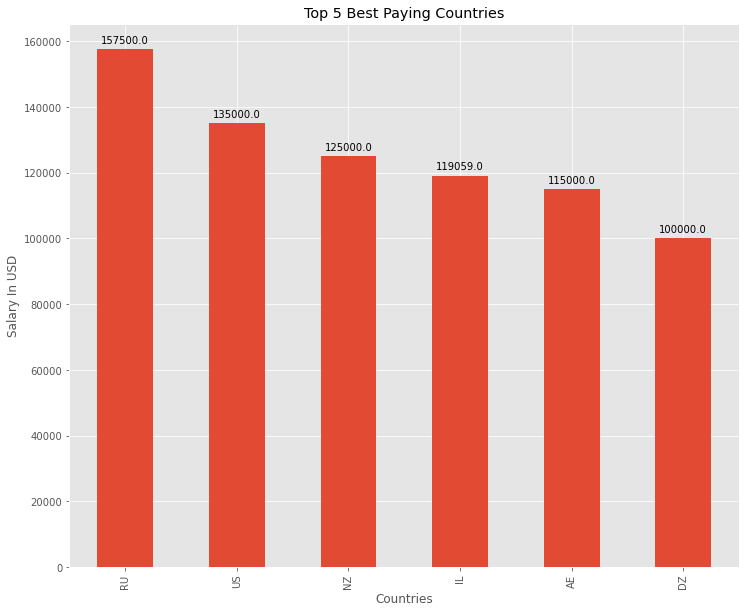

In [37]:
plt.figure(figsize = (12, 10))
bar = data.groupby('company_location')['salary_in_usd'].median().sort_values(ascending = False)[:6].plot(kind = 'bar')
# adding annotations on the plot
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
    
plt.title('Top 5 Best Paying Countries')
plt.xlabel('Countries')
plt.ylabel('Salary In USD')
plt.show()

#### Question
Which countries rank among the Least 5 countries as regards to average Salary in USD?

Vienam and Iran ranks the lowest paying countries on an average with 4,000 USD respectively 

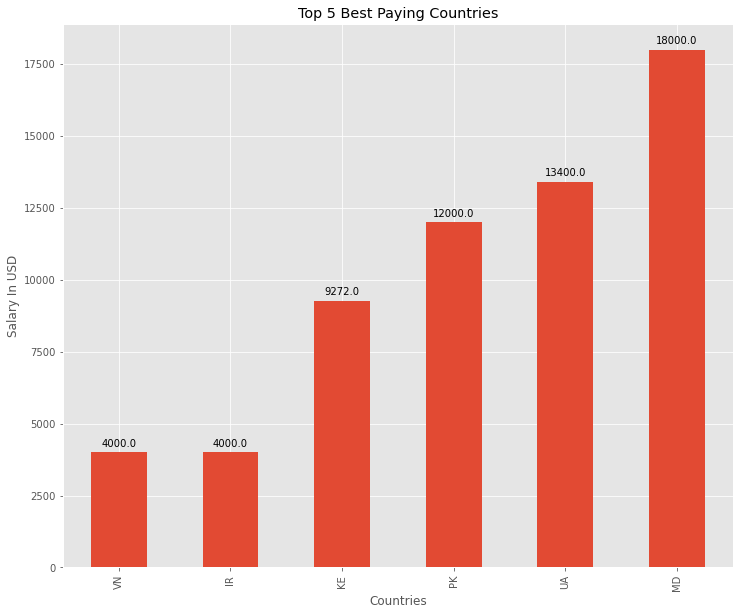

In [38]:
plt.figure(figsize = (12, 10))
bar = data.groupby('company_location')['salary_in_usd'].median().sort_values(ascending = True)[:6].plot(kind = 'bar')
# adding annotations on the plot
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
    
plt.title('Top 5 Best Paying Countries')
plt.xlabel('Countries')
plt.ylabel('Salary In USD')
plt.show()

#### Question
What branch of data science earns the most?

<strong>Data Engineer</strong> and <strong>Data Science</strong> both earn over 115,000 USD respectively with small diffenrences in thousands. <strong>Data Analyst</strong> earns the least with salary of 96,000 USD

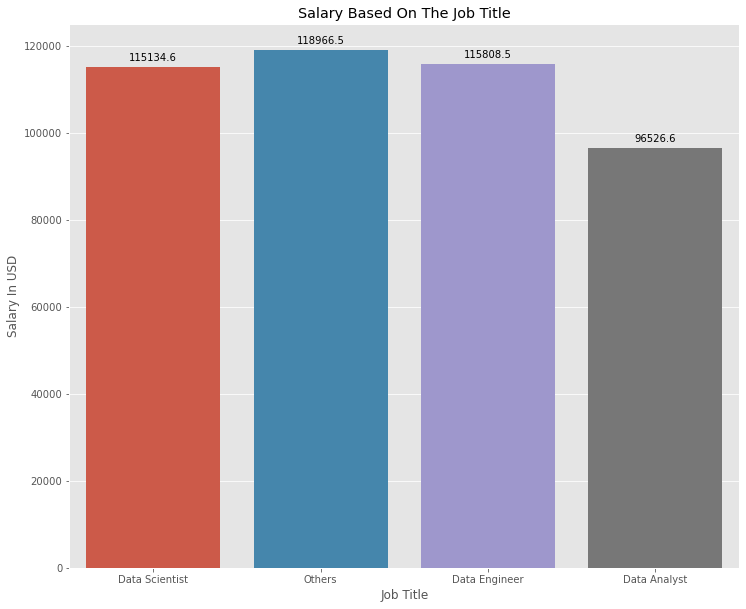

In [39]:
# checking how much a data scientist can earn based on the type of employment
plt.figure(figsize = (12, 10))
bar = sns.barplot(data = data, x = 'job_title', y = 'salary_in_usd', ci = False)
# adding annotations on the plot
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.title('Salary Based On The Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary In USD')
plt.show()

In [ ]:
!jupyter nbconvert DS_Salaries_Explanatory_Analysis.ipynb --to slides --post serve --no-input --no-prompt